In [5]:
#@title Setup
import numpy as np
import pandas as pd
import scipy.stats as ss
import pymc as pm
import seaborn as sns
import pprint
import ipywidgets as ip
import matplotlib.pyplot as plt
pp = pprint.PrettyPrinter().pprint

# Fit to existing data

In [ ]:
#data = pd.read_csv()
data = ss.norm().rvs(10000)
data

array([-0.98809279, -0.47831227, -1.0966729 , ..., -0.53577703,
       -0.12250108,  0.6049926 ])

In [ ]:
ss.norm.fit(data)
#grab your desired dist from the examples in the "Tweak Parameters" section

(-0.010592263856966528, 1.0056263500161875)

# Fit to intuition

In [ ]:
#Think of this bit as filling in the prompt "I'm [bounded_mass] percent sure that the value I'm looking for is between [lower bound] and [upper bound]."
#The distribution you use in the next step will need to be informed by your background knowledge or convention
#The initial guess dict will need to be filled in with appropriate parameter names and values but can be an uninformative guess.

lower_bound = 0.4 # @param {type:"number"}
upper_bound = 0.6 # @param {type:"number"}
bounded_mass = 0.5 # @param {type:"number", min:0, max:1}
initial_guess = {"mu" : 0, "sigma" : 1}

In [ ]:
con = pm.find_constrained_prior(
    pm.Normal,
    lower = lower_bound,
    upper = upper_bound,
    mass = bounded_mass,
    init_guess = initial_guess
    )
con

{'mu': 0.5000001993998712, 'sigma': 0.14826022860369226}

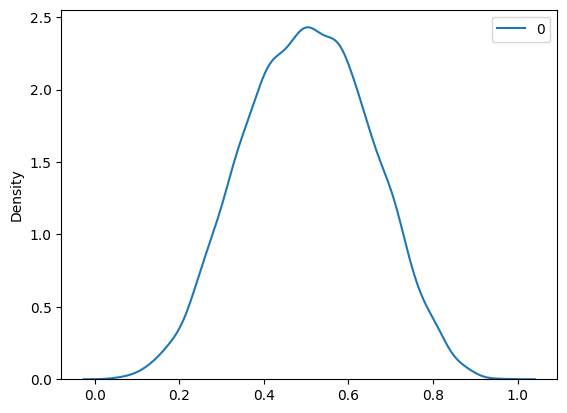

In [ ]:
with pm.Model():
    x = pm.Beta('x', **con)
    sns.kdeplot(pm.draw([x], draws = 10000))

# Tweak Parameters

In [ ]:
#@title Beta
def update_plot(a, b):
    x = np.linspace(0, 1, 100)
    plt.figure()
    y = ss.beta(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (1, 20, 0.1), b = (1, 20, 0.1));

In [ ]:
#@title Beta Binomial
def update_plot(n, a, b):
    x = np.linspace(1, n, n)
    plt.figure()
    y = ss.betabinom(n, a, b).pmf(x)
    pp(ss.describe(y)._asdict())
    plt.vlines(x, 0, y)
    plt.show()
ip.interact(update_plot, n = (0, 100, 1), a = (0, 100, 1), b = (0, 100, 1));

In [ ]:
#@title Binomial
def update_plot(n, p):
    x = np.linspace(1, n, n)
    plt.figure()
    y = ss.binom(n, p).pmf(x)
    pp(ss.describe(y)._asdict())
    plt.vlines(x, 0, y)
    plt.show()
ip.interact(update_plot, p = (0.01, 1, 0.01), n = (0, 100, 1));

In [ ]:
#@title Cauchy
def update_plot(a, b):
    x = np.linspace(-20, 20, 1000)
    plt.figure()
    y = ss.cauchy(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (-10, 10, 0.1), b = (0, 10, 0.1));

In [ ]:
#@title Exponential
def update_plot(a, b):
    x = np.linspace(0, 20, 1000)
    plt.figure()
    y = ss.expon(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (0, 10, 0.1), b = (0, 10, 0.1));

In [ ]:
#@title Gamma
def update_plot(a, b):
    x = np.linspace(0, 100, 1000)
    plt.figure()
    y = ss.gamma(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (0, 100, 0.1), b = (0, 10, 0.1));

In [ ]:
#@title Inverse Gamma
def update_plot(a):
    x = np.linspace(0, 20, 1000)
    plt.figure()
    y = ss.invgamma(a).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (0.01, 20, 0.01));

In [ ]:
#@title Gaussian
def update_plot(a, b):
    x = np.linspace(-20, 20, 1000)
    plt.figure()
    y = ss.norm(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (-10, 10, 0.1), b = (0, 10, 0.1));

In [ ]:
#@title Geometric
def update_plot(n, p):
    x = np.linspace(1, n, n)
    plt.figure()
    y = ss.geom(p).pmf(x)
    pp(ss.describe(y)._asdict())
    plt.vlines(x, 0, y)
    plt.show()
ip.interact(update_plot, p = (0.01, 1, 0.01), n = (0, 100, 1));

In [ ]:
#@title Hypergeometric
def update_plot(n, a, b):
    x = np.linspace(1, n, n)
    plt.figure()
    y = ss.hypergeom(n, a, b).pmf(x)
    pp(ss.describe(y)._asdict())
    plt.vlines(x, 0, y)
    plt.show()
ip.interact(update_plot, n = (0, 100, 1), a = (0, 100, 1), b = (0, 100, 1));

In [ ]:
#@title Laplace
def update_plot(a, b):
    x = np.linspace(-100, 100, 10000)
    plt.figure()
    y = ss.laplace(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (-100, 100, 0.1), b = (1, 100, 0.1));

In [25]:
#@title Logistic
def update_plot(a, b):
    x = np.linspace(-100, 100, 10000)
    plt.figure()
    y = ss.logistic(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (-100, 100, 0.1), b = (1, 100, 0.1));

interactive(children=(FloatSlider(value=0.0, description='a', min=-100.0), FloatSlider(value=50.0, description…

In [ ]:
#@title LogNormal
def update_plot(a):
    x = np.linspace(0, 20, 1000)
    plt.figure()
    y = ss.lognorm(a).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (0, 5, 0.01));

In [ ]:
#@title Negative Binomial
def update_plot(n, p):
    x = np.linspace(1, n*100, n*100)
    plt.figure()
    y = ss.nbinom(n, p).pmf(x)
    pp(ss.describe(y)._asdict())
    plt.vlines(x, 0, y)
    plt.show()
ip.interact(update_plot, p = (.01, 1, 0.01), n = (0, 100, 1));

In [ ]:
#@title Pareto
np.random.pareto
def update_plot(a, b):
    x = np.linspace(1, 50, 100)
    plt.figure()
    y = ss.pareto(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (0, 5, 0.01), b = (0, 10, 0.1));

In [ ]:
#@title Poisson
def update_plot(n):
    x = np.linspace(1, n*2, n*2)
    plt.figure()
    y = ss.poisson(n).pmf(x)
    pp(ss.describe(y)._asdict())
    plt.vlines(x, 0, y)
    plt.show()
ip.interact(update_plot, n = (0, 100, 1));

In [ ]:
#@title Student's t
def update_plot(a, b):
    x = np.linspace(-20, 20, 1000)
    plt.figure()
    y = ss.t(a, b).pdf(x)
    pp(ss.describe(y)._asdict())
    plt.plot(x, y)
    plt.show()
ip.interact(update_plot, a = (1, 20, 1), b = (0, 10, 0.1));